In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Show the first few rows
train.head()

# Check for missing values
train.isnull().sum()

# Summary statistics
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Age Distribution')

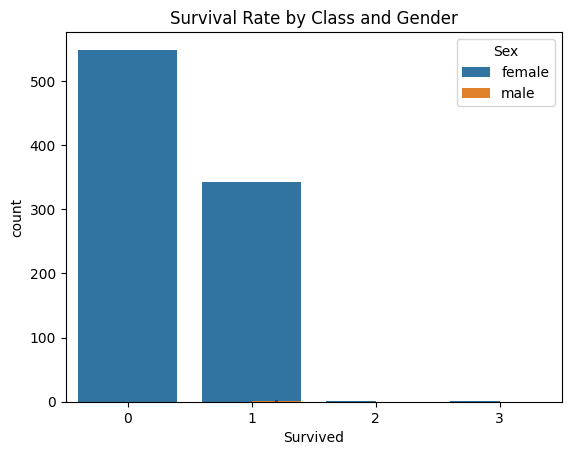

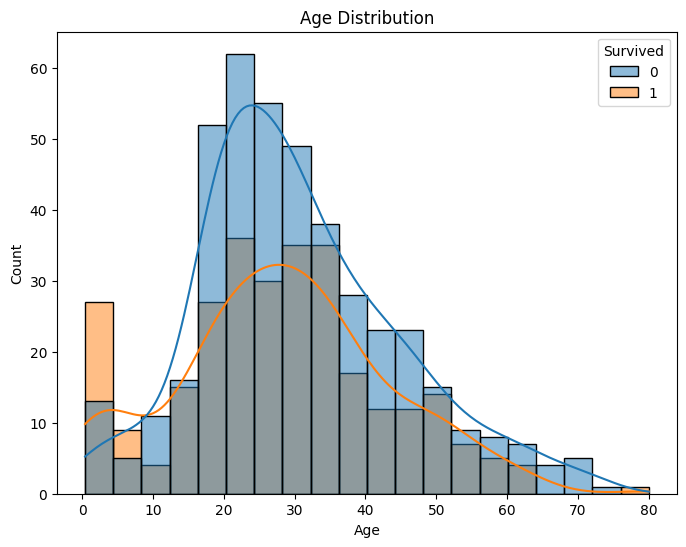

In [5]:
# Plot survival count
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')

# Survival rate by class and gender
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.title('Survival Rate by Class and Gender')

# Age distribution for survivors and non-survivors
plt.figure(figsize=(8,6))
sns.histplot(data=train, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution')


In [6]:
# Fill missing Age values with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing embarked with mode (most frequent value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing fare in test set with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Create FamilySize feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Extract Title from Name (feature engineering)
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify Title categories
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Convert categorical features to numerical using get_dummies
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

train.head()


<ipython-input-6-3a742c3acf56>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-6-3a742c3acf56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,2,True,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,False,False,True,True,False,False,False
3,1,1,35.0,1,0,53.1000,2,False,False,True,False,False,True,False
4,0,3,35.0,0,0,8.0500,1,True,False,True,False,True,False,False


In [7]:
# Split the training data into X (features) and y (target)
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_val = logreg.predict(X_val)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


Accuracy: 0.7932960893854749
[[87 18]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [8]:
# Train on full training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = logreg.predict(test)

# Prepare the submission file
submission = pd.DataFrame({
    "PassengerId": pd.read_csv('/content/test.csv')['PassengerId'],
    "Survived": y_test_pred
})

# Save the submission file
submission.to_csv('titanic_submission.csv', index=False)


In [9]:
# If needed, install the library for gradient boosting (XGBoost)
!pip install xgboost


In [10]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model using cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the average accuracy across all folds
print(f"Random Forest Cross-Validated Accuracy: {rf_scores.mean():.4f}")

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_test_preds = rf_model.predict(test)

# Create a submission file
rf_submission = pd.DataFrame({
    "PassengerId": pd.read_csv('/content/test.csv')['PassengerId'],
    "Survived": rf_test_preds
})

# Save the submission file
rf_submission.to_csv('rf_titanic_submission.csv', index=False)


Random Forest Cross-Validated Accuracy: 0.8283


In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters for tuning RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearch with RandomForest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train with grid search
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Predict using the best model
best_rf_model = grid_search_rf.best_estimator_
rf_test_preds_best = best_rf_model.predict(test)

# Create a submission file for the best RandomForest model
best_rf_submission = pd.DataFrame({
    "PassengerId": pd.read_csv('/content/test.csv')['PassengerId'],
    "Survived": rf_test_preds_best
})

best_rf_submission.to_csv('best_rf_titanic_submission.csv', index=False)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [16]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Fill missing Age values with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing embarked values with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing fare in the test set with the median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Create FamilySize feature (SibSp + Parch + 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Extract Title from Name and simplify categories
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare' and simplify some titles
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Convert categorical features to numerical using get_dummies
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Split the training data into X (features) and y (target)
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Import the GradientBoostingClassifier model from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model using cross-validation
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the average accuracy across all folds
print(f"Gradient Boosting Cross-Validated Accuracy: {gb_scores.mean():.4f}")

# Train the model on the full training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_test_preds = gb_model.predict(test)

# Create a submission file
gb_submission = pd.DataFrame({
    "PassengerId": pd.read_csv('/content/test.csv')['PassengerId'],
    "Survived": gb_test_preds
})

# Save the submission file
gb_submission.to_csv('gb_titanic_submission.csv', index=False)


<ipython-input-16-60bbdc4c3298>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-16-60bbdc4c3298>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Gradient Boosting Cross-Validated Accuracy: 0.8294


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Fill missing values for 'Age', 'Fare', and 'Embarked'
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Create FamilySize feature (SibSp + Parch + 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Extract Title from Name and simplify categories
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare'
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Convert categorical features to numerical using get_dummies
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Split the training data into X (features) and y (target)
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize multiple models
logreg = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)

# Combine models using VotingClassifier (Soft Voting for probabilities)
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_val = ensemble_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Ensemble Model Accuracy on validation set: {accuracy * 100:.2f}%")

# If accuracy is satisfactory, train on the full dataset and make predictions for the test set
ensemble_model.fit(X_train, y_train)
y_test_pred = ensemble_model.predict(test)

# Create a submission file
submission = pd.DataFrame({
    "PassengerId": pd.read_csv('/content/test.csv')['PassengerId'],
    "Survived": y_test_pred
})

# Save the submission file
submission.to_csv('ensemble_titanic_submission.csv', index=False)


<ipython-input-17-66a2767ef67d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-17-66a2767ef67d>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Ensemble Model Accuracy on validation set: 82.12%
